<img src="https://drive.google.com/uc?id=14nM3CJUfvOlMda8iO1nUbkmK1RBqSPPy" width="200" align="left">


Data Preparation | Topics:
--- | ---
| <center> features, label, churn,model, classification,Regression NLP, <br> TFIDF, Counter </center>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




# Intro
At this point, you might be surprised how relatively simple the machine learning coding is. <br>
First, it can get more complicated, for example with neural networks. <br>
But the main reason, is that all the data we have dealt with so far was prepared in advance.

Some studies showed that **machine learning practitioners spend 60 to 80% of their time with data preparation!**

In this notebook we will look at a real and raw Comcast data set and experience first-hand how messy data preparation is in real life.

This is just one concrete example. Each data set will have its own peculiarities, thus **data preparation often feels like problem solving**. <br>
I selected a really hard example, so, if you are able to follow this notebook, you should not be afraid to tackle other data sets.

# The Data
We received these data files and our task is to build a model that can accurately predict the Customer Churn based on given features and help CRM department . <br>
This is a supervised learning task because each query is labelled with the known correct intent. <br>
Furthermore, this is a classification and not a regression: our task is to determine which intent given a predefined list of possible intents.


Before we even think about what algorithm works well for this task, we have to make sense of the data and ultimately convert it to an input matrix $X$ and the vector of labels $y$, **all numbers**.

Note: the data file we are dealing with here is one of the original version, a few years old. Things have slowly but significantly improved since then.


# Loading of the Data

It always helps to start looking at the first few lines:

In [ ]:
CCPT_FILE = '/content/gdrive/My Drive/Colab Notebooks/AIAcademy_old/Data/Customer-Churn.csv'

# print the first few lines in this file
with open(CCPT_FILE) as f:
  for i in range(5):
    print(f.readline())


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn

7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No

5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No

3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes

7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No



(Reminder: Our task is to convert the above to a matrix of numbers $X$ and a vector of numbers $y$ so that we can apply some machine algorithm to the problem).

* the file format is CSV.
* The size of the file is 18MB so it should fit in memory without problem.

Let's use Pandas to read the whole csv file in memory.


In [ ]:
# Use Pandas' read_csv method to read the whole file in memory
# (it will fail on our first try)
# Name the returned data frame "data1"
import pandas as pd

data1 = pd.read_csv(CCPT_FILE, encoding='latin')
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA Exporatory Data Analysis

Ok, we were able to load the csv in memory. <br>
Pandas provide the `describe()` method that gives a quick overview of the whole file:

In [ ]:
data1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Key points:
* There are 7043 rows
* There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
* 'Total Charges' provides a numerical values, but the numbers are stored as on object
Some categorical features are stored as a string
* Churn is the target variable


Have a look at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.startswith.html


In [ ]:
# a quick overview of the data
data1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# find Unique values per column by using for loop
for column in data1.columns:
    unique_count = data1[column].nunique()
    unique_values = data1[column].unique()
    print(f"Unique {column}'s count: {unique_count}")
    print(unique_values)
    print()


Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

# Data Preprocessing for EDA

In [ ]:
# Making sure there aren't any unexpected data types
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
import pandas as pd
# Lets convert the datatype of features "TotalCharges" and "tenure" to float
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'], errors='coerce')
data1['tenure'] = data1['tenure'].astype(float)
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Rename feature values of "PaymentMethod" for better readability
payment_method_mapping = {'Electronic check': 'E-Check', 'Mailed check': 'Mailed check', 'Bank transfer (automatic)': 'Bank transfer', 'Credit card (automatic)': 'Credit card'}
data1["PaymentMethod"].replace(payment_method_mapping, inplace=True)
data1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# check for NA or null values
data1.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
# Visualize a frequency distribution for label
import plotly.graph_objects as go

churn_counts = data1['Churn'].value_counts()

fig = go.Figure(data=[
    go.Bar(x=churn_counts.index, y=churn_counts.values, marker_color='rgb(102, 197, 204)')
])

fig.update_layout(
    title='Churn Counts',
    xaxis_title='Churn',
    yaxis_title='Count',
    width=500,
    height=500,
    showlegend=False
)

fig.show()



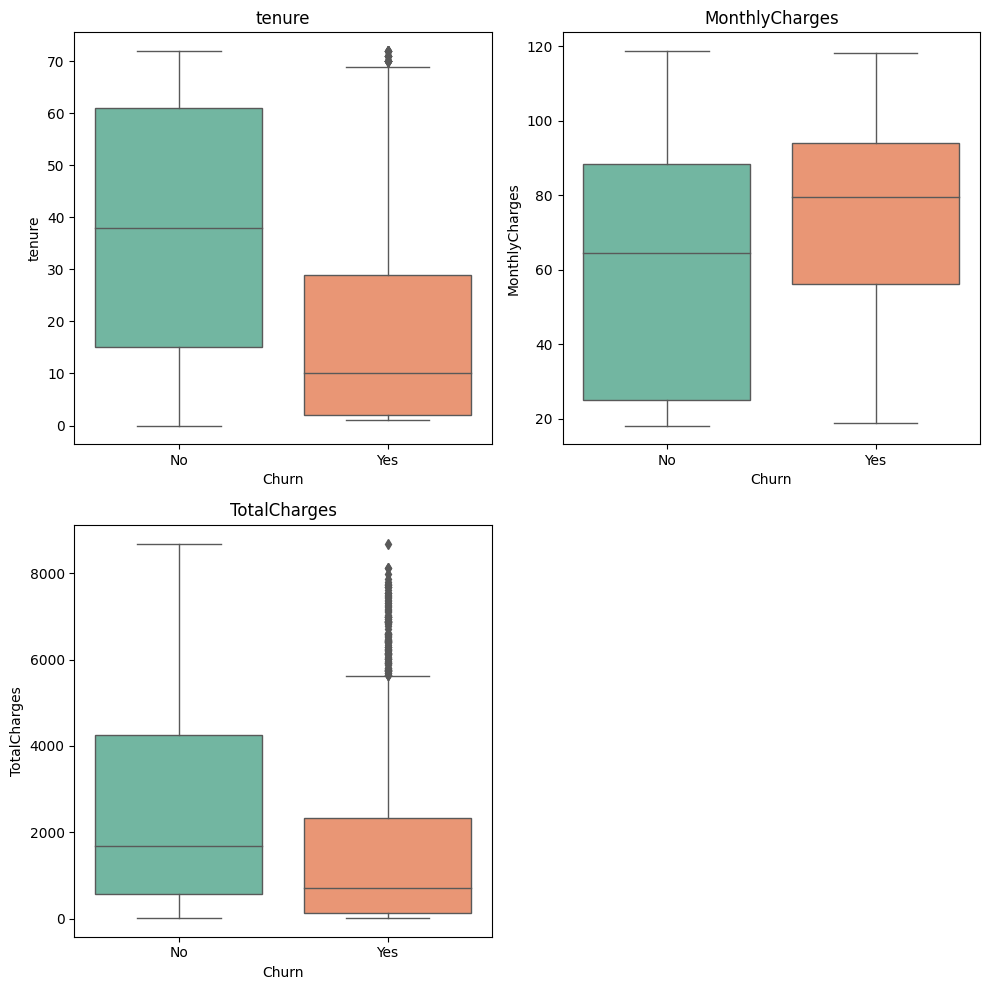

In [ ]:
# Lets work on generating boxplots
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots(x, y, data):
    num_plots = len(y)
    rows = (num_plots // 2) + (num_plots % 2)
    cols = 2

    plt.figure(figsize=(5 * cols, 5 * rows))

    for i, var in enumerate(y):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(x=x, y=var, data=data, palette="Set2", linewidth=1)
        plt.title(var)

    plt.tight_layout()
    plt.show()

create_boxplots("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], data1)


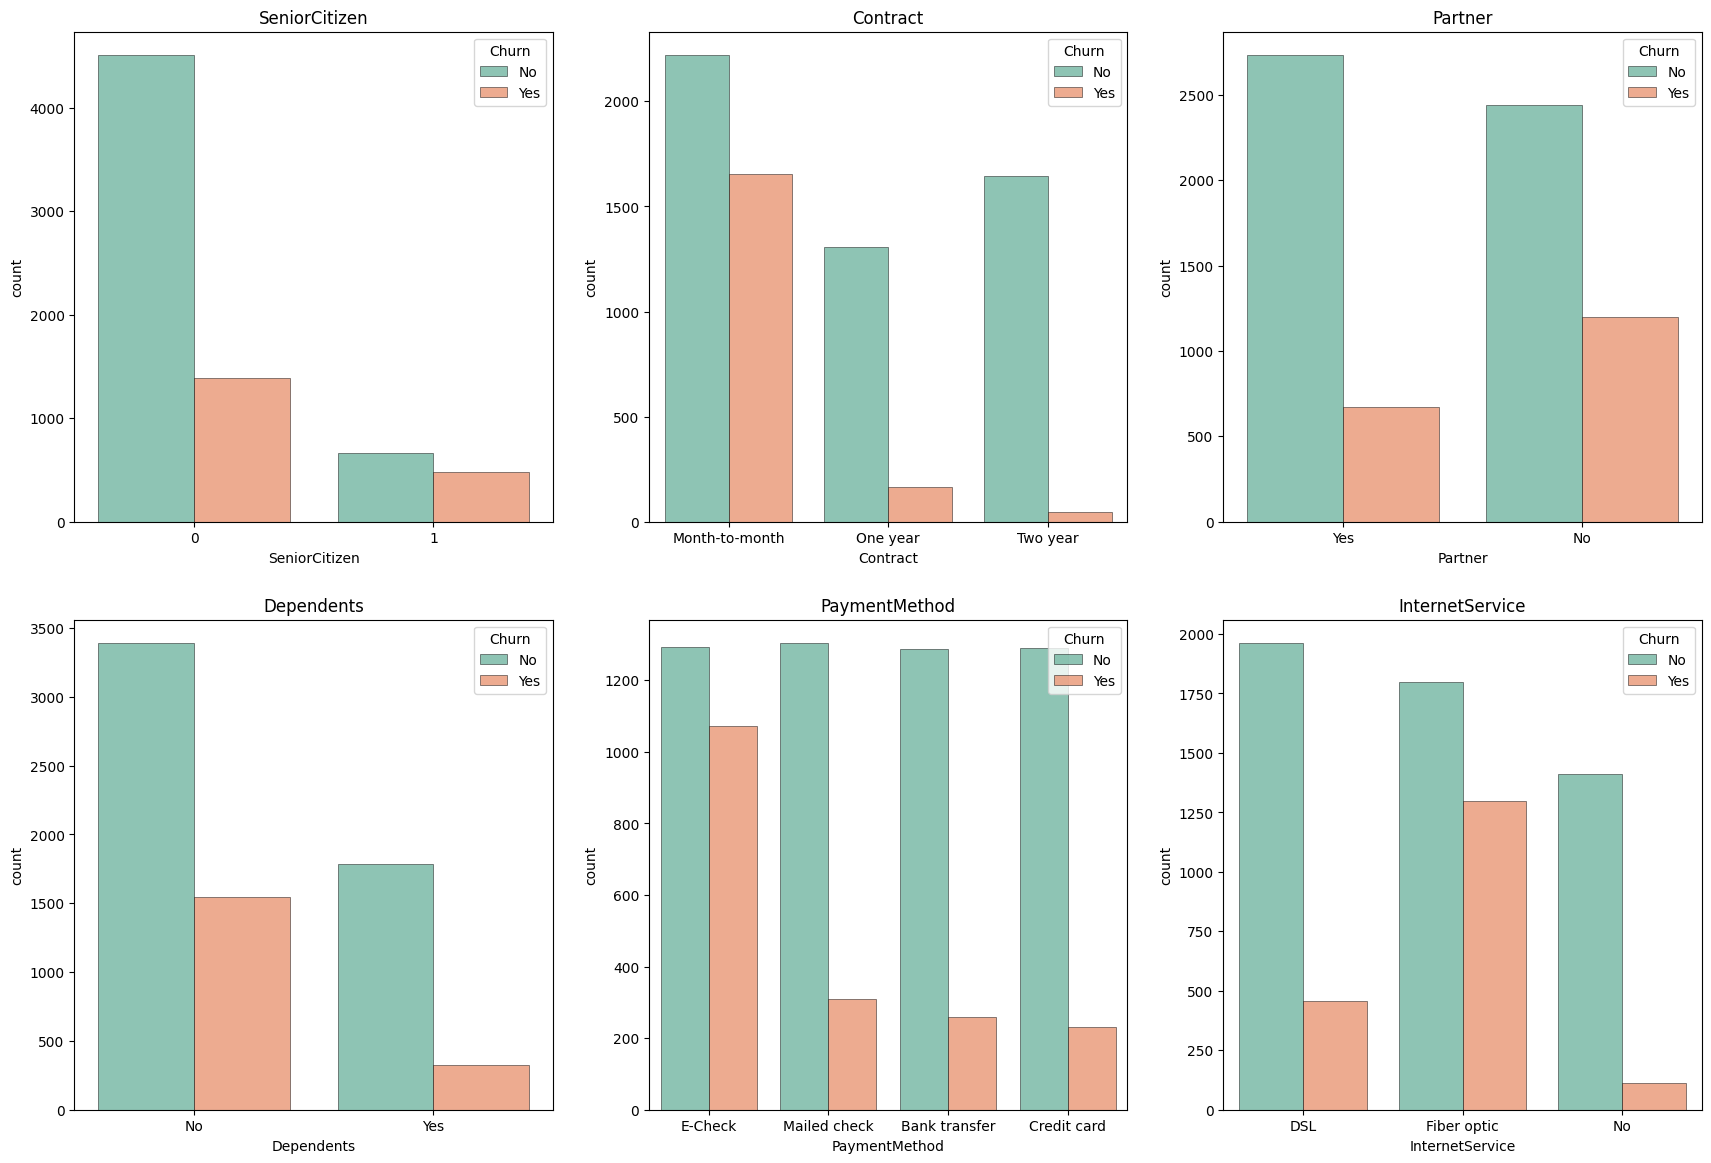

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_countplots(x, y, df):
    plots = {1: [1, 1], 2: [1, 2], 3: [1, 3], 4: [2, 2], 5: [2, 3], 6: [2, 3]}

    rows = plots[len(y)][0]
    columns = plots[len(y)][1]
    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate(y):

        plt.subplot(rows, columns, i+1)
        ax = sns.countplot(x=j, hue=x, data=df, palette='Set2', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    # Save each countplot as an image file
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        plt.savefig(f'countplot_{j}.png')  # Save countplot as image
    return plt.show()

# Generate countplots for various features.
generate_countplots("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], data1)


In [ ]:
# Apply the IQR approach to detect outliers by examining if values go beyond the IQR's bounds.
# Select the numerical features of interest
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]

# Create a new dataframe containing only the numerical features
df_num = data1[numerical_features]
descriptive_stats = df_num.describe()

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Check for outliers by comparing values against the outlier gates
outliers = ((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))

# Determine if any outliers exist
any_outliers = outliers.any()
any_outliers

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

In [ ]:
# Drop the rows with missing values.
data1 = data1.dropna()
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Drop the customerID feature from the dataset
data1 = data1.drop(columns='customerID')


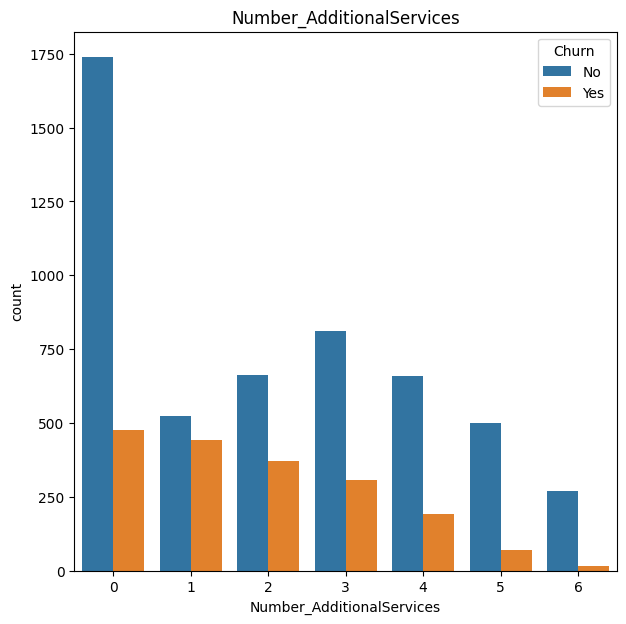

In [ ]:
# Generate a new feature "Number_AdditionalServices" by summing up the number of add-on services consumed
additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
data1['Number_AdditionalServices'] = data1[additional_services].apply(lambda row: sum(row == 'Yes'), axis=1)

# Define the countplot function
def countplot(x, y, df):
    rows = len(y)
    columns = 1
    plt.figure(figsize=(7*columns, 7*rows))
    for i, j in enumerate(y):
        plt.subplot(rows, columns, i+1)
        ax = sns.countplot(x=j, hue=x, data=df)
        ax.set_title(j)
    plt.show()

# Generate a countplot for the new feature
countplot('Churn', ['Number_AdditionalServices'], data1)

In [ ]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,E-Check,29.85,29.85,No,1
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No,3
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,E-Check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card,103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,E-Check,29.60,346.45,No,1
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


2.4.2. Label Encoding

In [ ]:
# Apply label encoding to the specified columns
encoded_columns = ['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def perform_label_encoding(columns, dataset):
    dataset = dataset.copy()  # Create a copy of the dataset
    for col in columns:
        dataset.loc[:, col] = dataset.loc[:, col].map({'Yes': 1, 'No': 0})
    return dataset

# Apply label encoding to the dataset
data1 = perform_label_encoding(encoded_columns, data1)

# Perform label encoding for the 'gender' column
data1.loc[:, 'gender'] = data1.loc[:, 'gender'].map({'Female': 1, 'Male': 0}).copy()

# Display the modified dataset
data1


<ipython-input-23-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-23-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-23-d733e927c936>:7: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

<ipython-input-23-d733e927c936>:7: DeprecationWarning:

In a future version,

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,1,0,1,0,1.0,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,E-Check,29.85,29.85,0,1
1,0,0,0,0,34.0,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,2
2,0,0,0,0,2.0,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,2
3,0,0,0,0,45.0,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0,3
4,1,0,0,0,2.0,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,E-Check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,5
7039,1,0,1,1,72.0,1,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card,103.20,7362.90,0,4
7040,1,0,1,1,11.0,0,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,1,E-Check,29.60,346.45,0,1
7041,0,1,1,0,4.0,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0


2.4.3 One-Hot-Encoding

In [ ]:
# Perform One-Hot Encoding for identified columns
one_hot_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df_encoded = pd.get_dummies(data1, columns=one_hot_columns)
df_encoded


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Credit card,PaymentMethod_E-Check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,0,0,1,1,0,0,0,0,0,0


2.4.4 Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns for Min-Max Scaling
scaling_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a DataFrame with the selected columns for scaling
scaling_df = df_encoded[scaling_columns]
scaling_df

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65
...,...,...,...
7038,24.0,84.80,1990.50
7039,72.0,103.20,7362.90
7040,11.0,29.60,346.45
7041,4.0,74.40,306.60


In [ ]:

# Create a DataFrame with the remaining columns
remaining_df = df_encoded.drop(columns=scaling_columns)
remaining_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Credit card,PaymentMethod_E-Check,PaymentMethod_Mailed check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
7039,1,0,1,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
7041,0,1,1,0,1,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [ ]:

# Perform Min-Max Scaling on the selected columns
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scaling_df)

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=scaling_columns, index=remaining_df.index)
scaled_df

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [ ]:

# Concatenate the scaled features with the remaining columns
final_df = pd.concat([remaining_df, scaled_df], axis=1)
final_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.000000,0.115423,0.001275
1,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0.464789,0.385075,0.215867
2,0,0,0,0,1,1,1,1,0,0,...,0,0,1,0,0,0,0,0.014085,0.354229,0.010310
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0.619718,0.239303,0.210241
4,1,0,0,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0.014085,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0.323944,0.662189,0.227521
7039,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1.000000,0.845274,0.847461
7040,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0.140845,0.112935,0.037809
7041,0,1,1,0,1,1,1,0,0,1,...,1,0,0,0,0,0,0,0.042254,0.558706,0.033210


2.4.5 Correlation

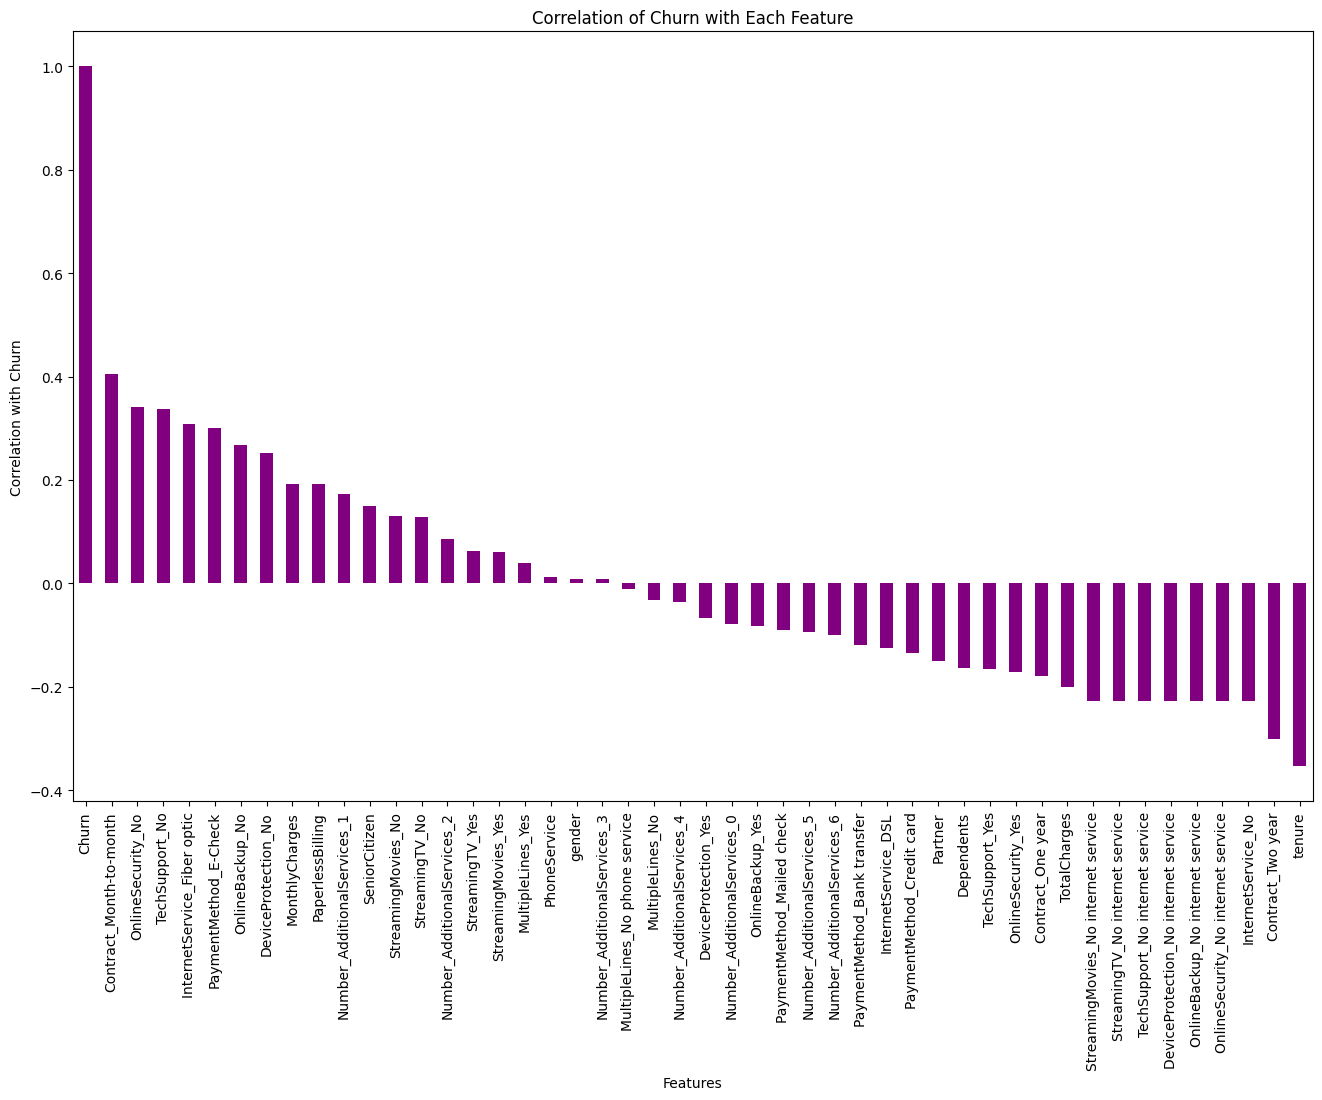

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Calculate the correlation of Churn with each of the remaining features
correlation = final_df.corr()['Churn'].sort_values(ascending=False)

# Plot the correlation values
plt.figure(figsize=(16, 10))
correlation.plot(kind='bar', color='purple')  # Change the color to purple
plt.xlabel('Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Churn with Each Feature')
plt.show()


2.5 Training and Testing

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X = final_df.drop('Churn', axis=1).values
y = final_df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_df=X
X_df

array([[1.        , 0.        , 1.        , ..., 0.        , 0.11542289,
        0.0012751 ],
       [0.        , 0.        , 0.        , ..., 0.46478873, 0.38507463,
        0.21586661],
       [0.        , 0.        , 0.        , ..., 0.01408451, 0.35422886,
        0.01031041],
       ...,
       [1.        , 0.        , 1.        , ..., 0.14084507, 0.11293532,
        0.03780868],
       [0.        , 1.        , 1.        , ..., 0.04225352, 0.55870647,
        0.03321025],
       [0.        , 0.        , 0.        , ..., 0.91549296, 0.86965174,
        0.78764136]])

EVALUATION Metrics

Install manually with the command
!pip install scikit-plot

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")

    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    plt.show()
    return print("")

In [ ]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, classifier_name):

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize=None, ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize='true', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_knn)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")


In [ ]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.plot([0, 1], [0, 1], 'k--')  # Add the dotted line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.legend()
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')


In [ ]:
def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    y_pred_prob = y_pred_probabilities[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=classifier_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.legend()
    plt.show()

    f1_score_result = f1_score(y_test, y_pred)
    auc_score_result = auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')


Model Selection

KNN

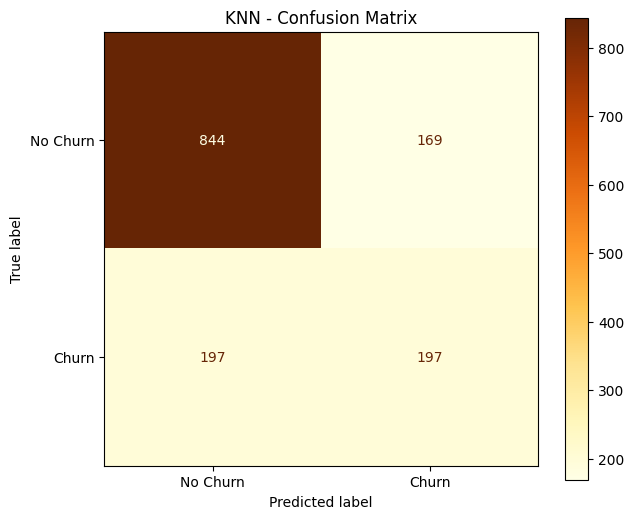

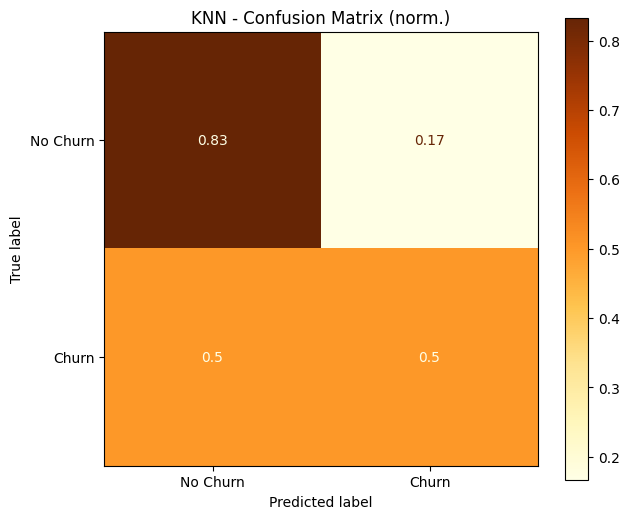

Accuracy Score Test: 0.7398720682302772
Accuracy Score Train: 0.8387555555555556 (as comparison)



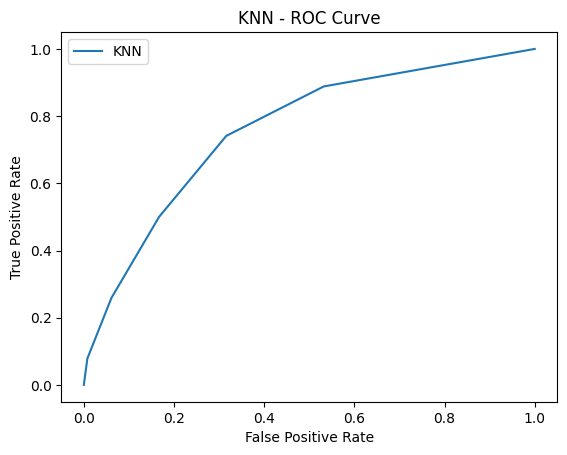

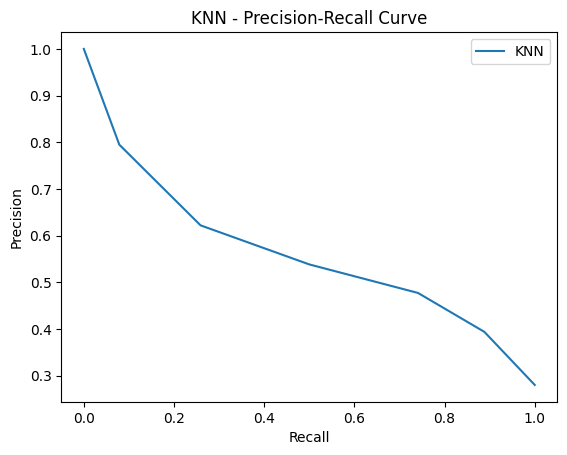

F1 Score: 0.518421052631579 
AUC Score (PR): 0.5622681678707674



In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the KNN classifier based on the training set
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained classifier on the test set
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

# Plot model evaluations - Confusion Matrix
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, 'KNN')

# Plot model evaluations - ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_prob[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.legend()
plt.show()

# Plot model evaluations - Precision-Recall Curve and F1 Score
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')


Logistic Regression

In [ ]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, classifier_name, y_pred=None):
    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    if y_pred is not None:
        accuracy = (y_test == y_pred).mean()
        print(f'Accuracy Score Test: {accuracy}')
        print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')

    return print("")


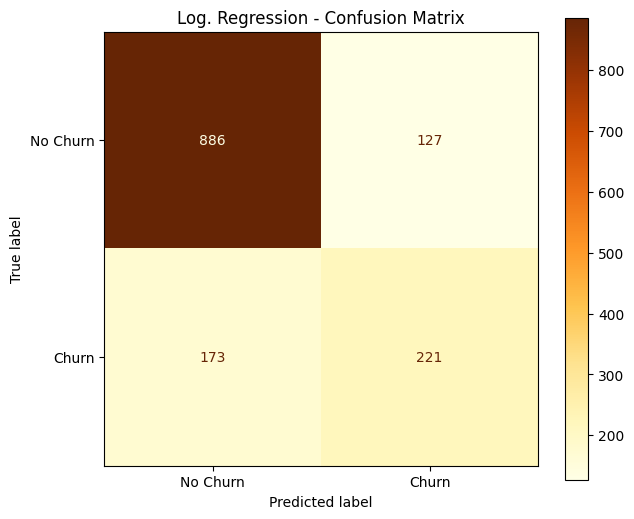

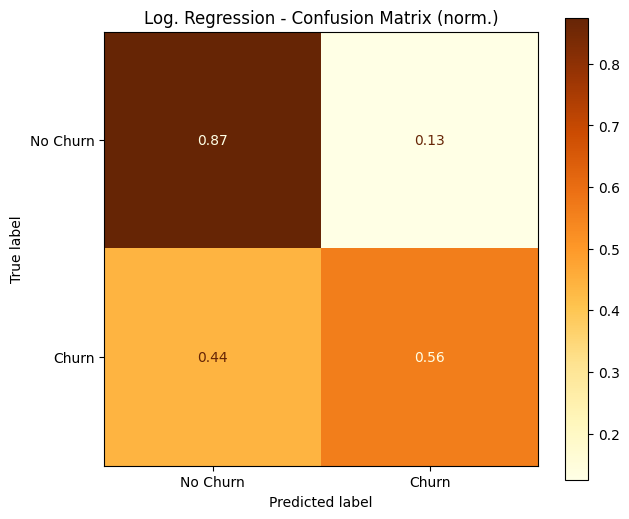

Accuracy Score Test: 0.7867803837953091
Accuracy Score Train: 0.8092444444444444 (as comparison)



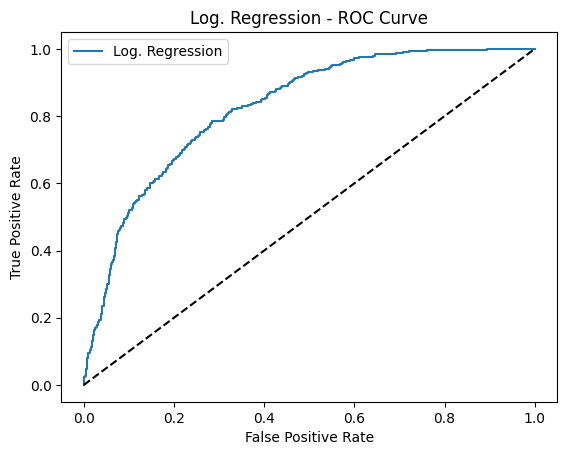

AUC Score (ROC): 0.8255370538331638



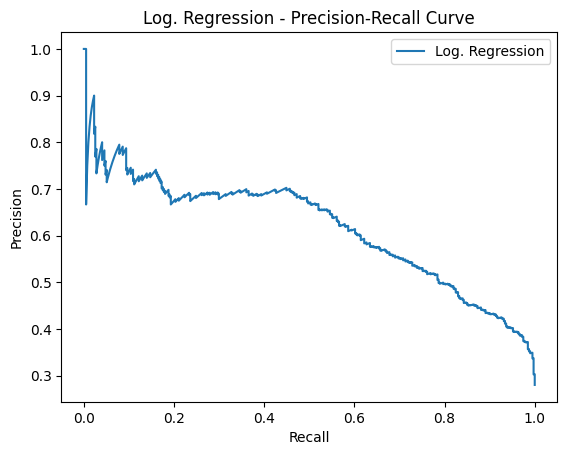

F1 Score: 0.5956873315363881 
AUC Score (PR): 0.6171904855440647



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained logistic regression model on the test set.
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

# Plot model evaluations for logistic regression.
#feature_weights(X, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, 'Log. Regression', y_pred_logreg)
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')



Random Forest

In [ ]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap='YlOrBr', normalize='true', ax=ax)
    disp.ax_.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = classifier.score(X_train, y_train)

    print(f'Accuracy Score Test: {accuracy_test}')
    print(f'Accuracy Score Train: {accuracy_train} (as comparison)')


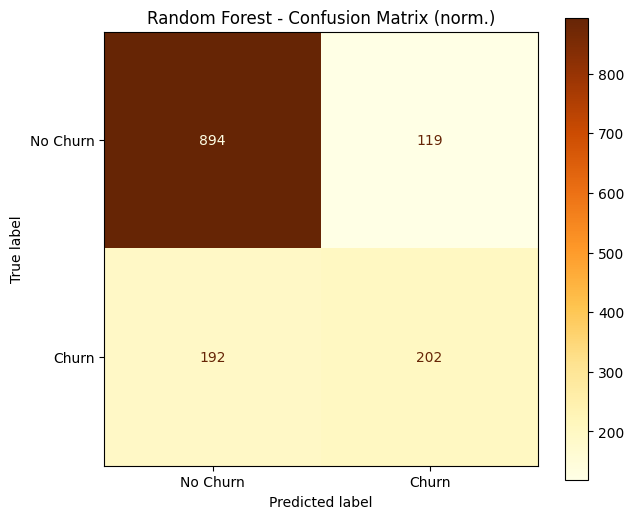

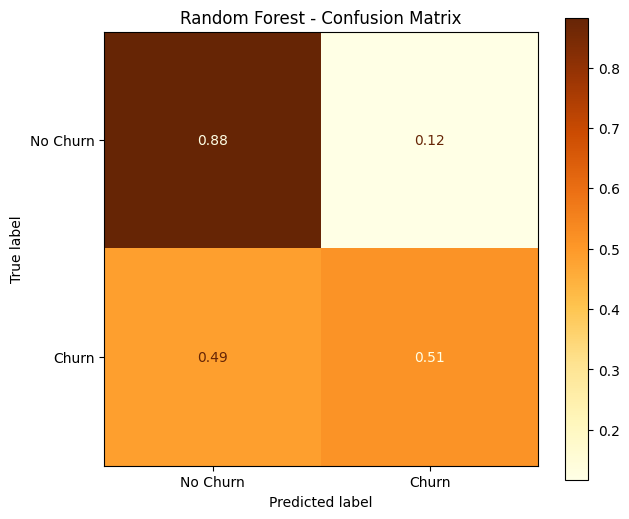

Accuracy Score Test: 0.7789623312011372
Accuracy Score Train: 0.9975111111111111 (as comparison)


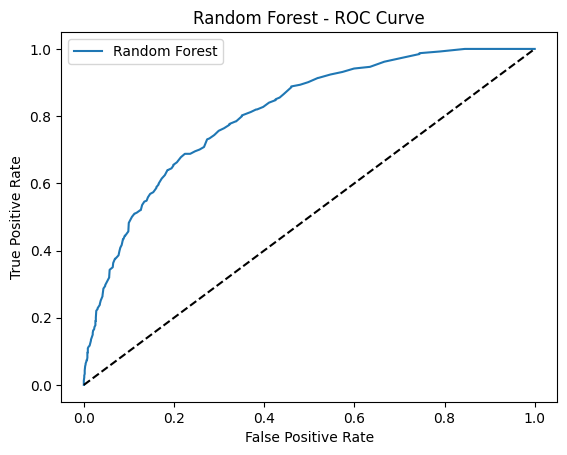

AUC Score (ROC): 0.80887923993165



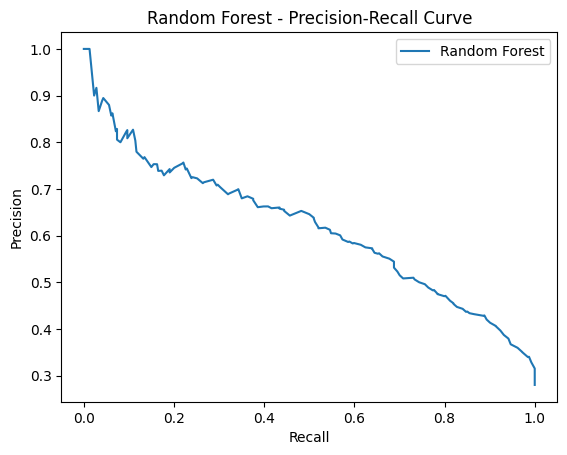

F1 Score: 0.565034965034965 
AUC Score (PR): 0.6182467994884935



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the random forest model based on the training set.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')


SVM

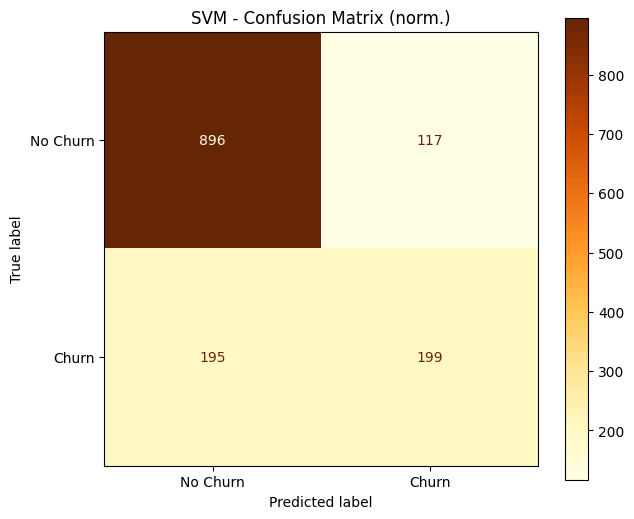

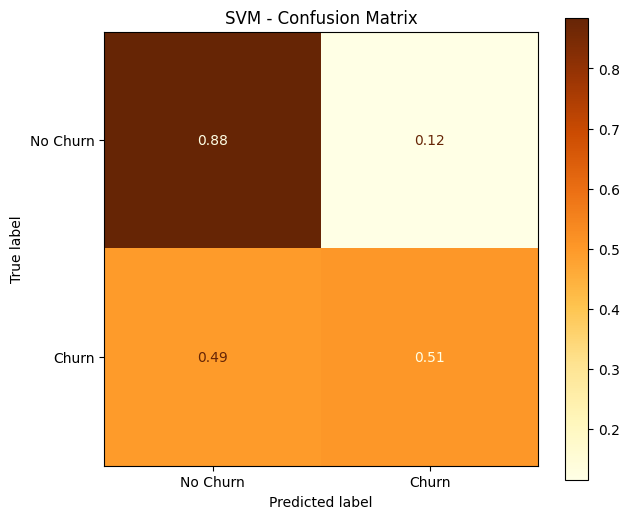

Accuracy Score Test: 0.7782515991471215
Accuracy Score Train: 0.8222222222222222 (as comparison)


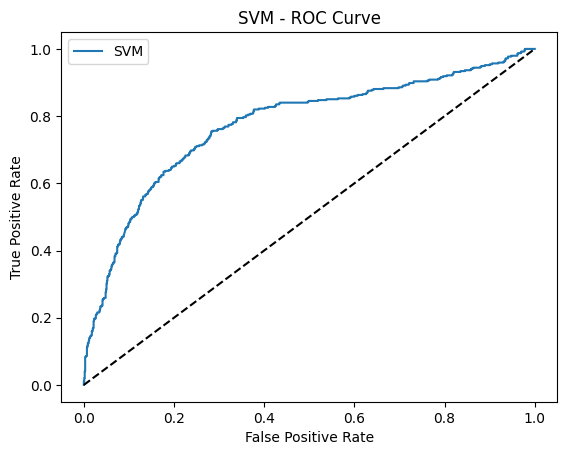

AUC Score (ROC): 0.7748620722485856



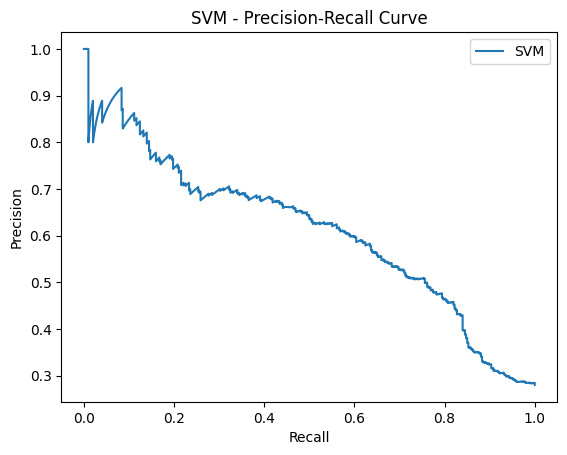

F1 Score: 0.5605633802816902 
AUC Score (PR): 0.6097696118648525



In [ ]:
from sklearn.svm import SVC

# Instantiate and train the SVM model on the training set.
support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')
